## Cournot Competition with Efficiency Changes

In [140]:

import sympy as sp
import numpy as np
from sympy import init_printing # Το init_printing εισάγει το LaTeX printing
init_printing(use_latex='mathjax')
import math
import matplotlib.pyplot as plt

In [141]:
#Βασικές παράμετροι υποδείγματος
# Ποσότητες
Q, q1 , q2, q3, c = sp.var('Q, q1, q2,q3,c', real=True, positive=True)
# Κόστος, τιμή
TC1, TC12, TC22, p = sp.var('TC1, TC12, TC22m  p', real=True, positive=True)

Παράμετρος TC1 εκφράζει το συνολικό κόστος της Επιχείρησης 1 και δίνεται από την σχέση $TC1= 4q_1$. Αντίστοιχα, για την Επιχείρηση 2 αρχικά υποθέτουμε συμμετρικό κόστος, δλδ $TC12=4q_2$ ενώ στην συνέχεια υποθέτουμε ότι η τεχνολογία μειώνει το οριακό κόστος σε 2, $TC22= 2q_2$

In [142]:
TC1 = 4*q1;
TC12 = 4*q2;
TC22 = 2*q2


Η αντίστροφη συνάρτηση ζήτησης είναι:

In [143]:
p =10 -Q
price = p.xreplace({Q :q1+q2})
price

-q₁ - q₂ + 10

Η συνάρτηση κερδών για τις δύο επιχειρήσεις είναι:

In [144]:
profit1 = price*q1 -TC1;
profit21 = price*q2 -TC12;
profit22 = price*q2 -TC22;

profit1.expand(), profit21.expand(), profit22.expand()

⎛    2                            2                    2       ⎞
⎝- q₁  - q₁⋅q₂ + 6⋅q₁, -q₁⋅q₂ - q₂  + 6⋅q₂, -q₁⋅q₂ - q₂  + 8⋅q₂⎠

Στην συνέχεια υπολογίζουμε τις συναρτήσεις βέλτιστης αντίδρασης για την συμμετρική περίπτωση. Μεγιστοποιούμε τις συναρτήσεις κέρδους ως προς τις στρατηγικές μεταβλητές $q_1, q_2$.

In [145]:
#Για την Επιχείρηση 1, μεγιστοποιούμε την συνάρτηση κερδών της ως προς το q1
BR1 =sp.solve(sp.diff(profit1, q1), q1)
BR21 =sp.solve(sp.diff(profit21, q2), q2)
BR22 =sp.solve(sp.diff(profit22, q2), q2)


BR1, BR21, BR22

⎛⎡    q₂⎤  ⎡    q₁⎤  ⎡    q₁⎤⎞
⎜⎢3 - ──⎥, ⎢3 - ──⎥, ⎢4 - ──⎥⎟
⎝⎣    2 ⎦  ⎣    2 ⎦  ⎣    2 ⎦⎠

Υπολογίζουμε την ισορροπία  Nash για την συμμετρική περίπτωση


In [146]:
Nash = sp.solve((q1-BR1[0], q2-BR21[0]), q1, q2)
Nash

{q₁: 2, q₂: 2}

Τα κέρδη της Επιχείρησης είναι:

In [147]:
profit1.subs(Nash), profit21.subs(Nash)

(4, 4)

Υπολογίζουμε την ισορροπία Nash για την περίπτωση των μεταβολών αποτελεσματικότητας.

In [148]:
Nash2 = sp.solve((q1-BR1[0], q2-BR22[0]), q1, q2)
Nash2

{q₁: 4/3, q₂: 10/3}

τα αντίστοιχα κέρδη είναι:

In [149]:
profit1.subs(Nash2), profit22.subs(Nash2)

(16/9, 100/9)

### Διαγράμματα για τις καμπύλες βέλτιστης αντίδρασης

Αρχικά θα πρέπει να εκφράζουμε την συνάρτηση βέλτιστης αντίδρασης της Επιχείρησης 2 ως μια συνάρτηση του $q_1$

In [150]:
BR21 = sp.solve(q2-BR21[0], q1);
BR22 = sp.solve(q2-BR22[0], q1);

BR21, BR22

([6 - 2⋅q₂], [8 - 2⋅q₂])

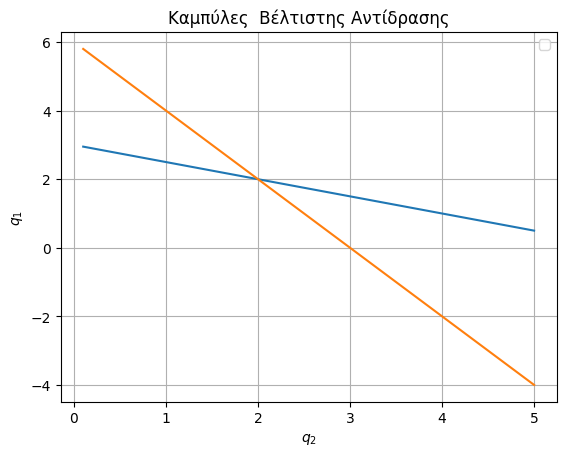

In [151]:
from numpy import linspace
Firm1BR = sp.lambdify(q2, BR1[0], modules=['numpy'])
Firm2BR1 = sp.lambdify(q2,BR21[0], modules=['numpy'])
Firm2BR2 = sp.lambdify(q2,BR22[0], modules=['numpy'])


x_vals = linspace(0.1, 5, 200)
y_vals = Firm1BR(x_vals)
z_vals = Firm2BR1(x_vals)
w_vals = Firm2BR2(x_vals)

plt.title('Καμπύλες  Βέλτιστης Αντίδρασης')
plt.grid(True)
plt.ylabel("$q_1$")
plt.xlabel("$q_2$")
plt.legend(['Επιχείρ.1', 'Επιχείρ.2'])


plt.plot(x_vals, y_vals, x_vals, z_vals)
plt.show()

Το διάγραμμα μετά την μεταβολή αποτελεσματικότητας

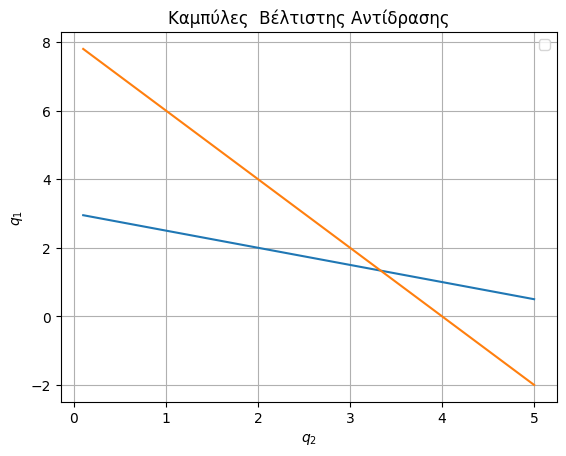

In [152]:
plt.title('Καμπύλες  Βέλτιστης Αντίδρασης')
plt.grid(True)
plt.ylabel("$q_1$")
plt.xlabel("$q_2$")
plt.legend(['Firm1', 'Firm2'])


plt.plot(x_vals, y_vals, x_vals, w_vals)
plt.show()

## Συγχωνέυσεις

Αρχικά, λύνουμε το πρόβλημα Cournot με τρεις συμμετρικές Επιχειρήσεις και υπολογίζουμε τα κέρδη της κάθε Επιχείρησης.

In [153]:
p =1 -Q
price = p.xreplace({Q :q1+q2+q3})
price

-q₁ - q₂ - q₃ + 1

Η συνάρτηση κόστους της Επιχείρησης 1 (αντίστοιχα για τις άλλες δύο Επιχειρήσεις),

In [154]:
TC1 = c*q1

Η συνάρτηση κερδών της Επιχείρησης 1,

In [155]:
profit1 = price*q1 -TC1;

profit1.expand()

          2                     
-c⋅q₁ - q₁  - q₁⋅q₂ - q₁⋅q₃ + q₁

Στο πρόβλημα μεγιστοποίησης, από τις ΑΣΠΤ λαμβάνουμε,

In [156]:
sp.diff(profit1, q1)

-c - 2⋅q₁ - q₂ - q₃ + 1

Στην συμμετρική περίπτωση, ισχύει ότι $q_1=q_2=q_3$. Αντικαθιστώ ανάλογα.

In [157]:
FOC = sp.diff(profit1, q1).xreplace({q2:q1, q3:q1})

FOC

-c - 4⋅q₁ + 1

Λϋνω ως προς το $q_1$ ώστε να υπολογίσω την συμμετρική ισορροπία  Nash

In [158]:
Nash = sp.solve(FOC,q1);

Nash

⎡1   c⎤
⎢─ - ─⎥
⎣4   4⎦

Η τιμή στην ισορροπία υπολογίζεται ως:


In [162]:
profit = profit1.xreplace({q2:q1, q3:q1})

In [166]:
profit.subs(q1, Nash[0]).factor() #factor είναι η αντίστροφη λειτουργία από το expand()

       2
(c - 1) 
────────
   16   